In [10]:
from  google.colab import files
files.upload()

Saving INDU.csv to INDU (1).csv


{'INDU.csv': b'Date,Close\r\n29-06-15,17596.35\r\n30-06-15,17619.51\r\n01-07-15,17757.91\r\n02-07-15,17730.11\r\n06-07-15,17683.58\r\n07-07-15,17776.91\r\n08-07-15,17515.42\r\n09-07-15,17548.62\r\n10-07-15,17760.41\r\n13-07-15,17977.68\r\n14-07-15,18053.58\r\n15-07-15,18050.17\r\n16-07-15,18120.25\r\n17-07-15,18086.45\r\n20-07-15,18100.41\r\n21-07-15,17919.29\r\n22-07-15,17851.04\r\n23-07-15,17731.92\r\n24-07-15,17568.53\r\n27-07-15,17440.59\r\n28-07-15,17630.27\r\n29-07-15,17751.39\r\n30-07-15,17745.98\r\n31-07-15,17689.86\r\n03-08-15,17598.2\r\n04-08-15,17550.69\r\n05-08-15,17540.47\r\n06-08-15,17419.75\r\n07-08-15,17373.38\r\n10-08-15,17615.17\r\n11-08-15,17402.84\r\n12-08-15,17402.51\r\n13-08-15,17408.25\r\n14-08-15,17477.4\r\n17-08-15,17545.18\r\n18-08-15,17511.34\r\n19-08-15,17348.73\r\n20-08-15,16990.69\r\n21-08-15,16459.75\r\n24-08-15,15871.35\r\n25-08-15,15666.44\r\n26-08-15,16285.51\r\n27-08-15,16654.77\r\n28-08-15,16643.01\r\n31-08-15,16528.03\r\n01-09-15,16058.35\r\n02-09-1

In [2]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
series = read_csv('INDU.csv')
#series = series.iloc[::-1]

In [12]:
series

,Date,Close
0,29-06-15,17596.35
1,30-06-15,17619.51
2,01-07-15,17757.91
3,02-07-15,17730.11
4,06-07-15,17683.58
...,...,...
1131,24-12-19,28515.45
1132,26-12-19,28621.39
1133,27-12-19,28645.26
1134,30-12-19,28462.14


In [13]:
series['Date'] = pd.to_datetime(series['Date'], dayfirst=True)
series.set_index("Date", drop=False, inplace=True)

In [7]:
series.drop('Date', axis=1, inplace=True)

In [15]:
pro_data = series.iloc[:,:]

In [ ]:
#series = read_csv('INDU.csv',index_col=0)
# fit model
model = ARIMA(series, order=(5,2,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D2.Close   No. Observations:                 1255
Model:                 ARIMA(5, 2, 0)   Log Likelihood               -8962.236
Method:                       css-mle   S.D. of innovations            305.462
Date:                Thu, 25 Jun 2020   AIC                          17938.472
Time:                        08:58:25   BIC                          17974.416
Sample:                             2   HQIC                         17951.981
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1714      2.540     -0.067      0.946      -5.150       4.807
ar.L1.D2.Close    -0.9772      0.028    -34.624      0.000      -1.033      -0.922
ar.L2.D2.Close    -0.6284      0.038

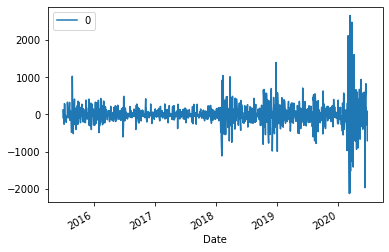

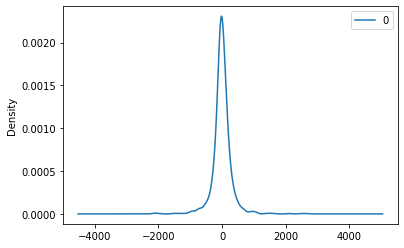

                 0
count  1255.000000
mean     -0.004418
std     305.597969
min   -2128.152451
25%    -101.533303
50%      -6.316144
75%     112.791920
max    2652.625789


In [ ]:
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [ ]:
X = series['Close'].values
size = int(len(X) * 0.90)
#train, test = X[0:size], X[size:len(X)]
train = X[:]
#test = X[885:1136]
history = [x for x in train]


In [ ]:
'''
from pyramid.arima import auto_arima
model = auto_arima(history, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(history)

predictions = model.predict(n_periods=15)
'''

predictions = list()
for t in range(1):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(yhat)
	print('predicted=%f, expected=%f' % (yhat, obs))


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision 

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=15133.353, BIC=15163.559, Fit time=0.980 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=15132.596, BIC=15142.664, Fit time=0.036 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=15134.535, BIC=15149.638, Fit time=0.074 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=15134.534, BIC=15149.637, Fit time=0.107 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=15131.211, BIC=15151.348, Fit time=0.748 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=15131.585, BIC=15156.757, Fit time=1.286 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=15131.546, BIC=15156.718, Fit time=1.347 seconds
Total fit time: 4.586 seconds


"\npredictions = list()\nfor t in range(15):\n\tmodel = ARIMA(history, order=(5,1,0))\n\tmodel_fit = model.fit(disp=0)\n\toutput = model_fit.forecast()\n\tyhat = output[0]\n\tpredictions.append(yhat)\n\t#obs = test[t]\n\thistory.append(yhat)\n\t#print('predicted=%f, expected=%f' % (yhat, obs))\n"

In [ ]:
'''
predictions = list()
for t in range(15):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	#obs = test[t]
	history.append(yhat)
	#print('predicted=%f, expected=%f' % (yhat, obs))
'''

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test[:-1], predictions)

49698.63995196714

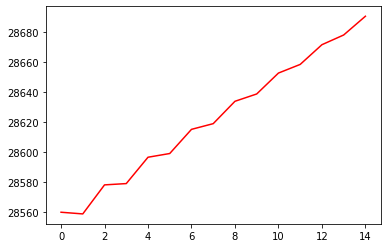

In [ ]:
#pyplot.subplots(figsize = (20,20))
#pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
from  google.colab import files
files.upload()

Saving 11111.csv to 11111.csv


{'11111.csv': b'Date,Close\r\n29-06-15,17596.35\r\n30-06-15,17619.51\r\n01-07-15,17757.91\r\n02-07-15,17730.11\r\n06-07-15,17683.58\r\n07-07-15,17776.91\r\n08-07-15,17515.42\r\n09-07-15,17548.62\r\n10-07-15,17760.41\r\n13-07-15,17977.68\r\n14-07-15,18053.58\r\n15-07-15,18050.17\r\n16-07-15,18120.25\r\n17-07-15,18086.45\r\n20-07-15,18100.41\r\n21-07-15,17919.29\r\n22-07-15,17851.04\r\n23-07-15,17731.92\r\n24-07-15,17568.53\r\n27-07-15,17440.59\r\n28-07-15,17630.27\r\n29-07-15,17751.39\r\n30-07-15,17745.98\r\n31-07-15,17689.86\r\n03-08-15,17598.2\r\n04-08-15,17550.69\r\n05-08-15,17540.47\r\n06-08-15,17419.75\r\n07-08-15,17373.38\r\n10-08-15,17615.17\r\n11-08-15,17402.84\r\n12-08-15,17402.51\r\n13-08-15,17408.25\r\n14-08-15,17477.4\r\n17-08-15,17545.18\r\n18-08-15,17511.34\r\n19-08-15,17348.73\r\n20-08-15,16990.69\r\n21-08-15,16459.75\r\n24-08-15,15871.35\r\n25-08-15,15666.44\r\n26-08-15,16285.51\r\n27-08-15,16654.77\r\n28-08-15,16643.01\r\n31-08-15,16528.03\r\n01-09-15,16058.35\r\n02-09-

In [ ]:
test_res = pd.read_csv('11111.csv')



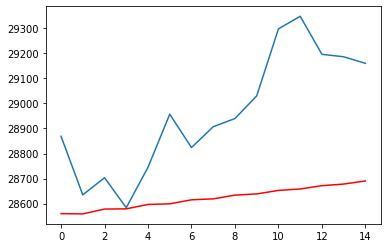

In [ ]:
pyplot.plot(test_res['Close'][1136:1136+15].values)
pyplot.plot(predictions, color='red')


In [48]:
from google.colab import files
files.upload()

Saving ytrue.csv to ytrue.csv


{'ytrue.csv': b'Date,Close\r\n02-01-20,28868.8\r\n03-01-20,28634.88\r\n06-01-20,28703.38\r\n07-01-20,28583.68\r\n08-01-20,28745.09\r\n09-01-20,28956.9\r\n10-01-20,28823.77\r\n13-01-20,28907.05\r\n14-01-20,28939.67\r\n15-01-20,29030.22\r\n16-01-20,29297.64\r\n17-01-20,29348.1\r\n21-01-20,29196.04\r\n22-01-20,29186.27\r\n23-01-20,29160.09\r\n24-01-20,28989.73\r\n27-01-20,28535.8\r\n28-01-20,28722.85\r\n29-01-20,28734.45\r\n30-01-20,28859.44\r\n31-01-20,28256.03\r\n03-02-20,28399.81\r\n04-02-20,28807.63\r\n05-02-20,29290.85\r\n06-02-20,29379.77\r\n07-02-20,29102.51\r\n10-02-20,29276.82\r\n11-02-20,29276.34\r\n12-02-20,29551.42\r\n13-02-20,29423.31\r\n14-02-20,29398.08\r\n18-02-20,29232.19\r\n19-02-20,29348.03\r\n20-02-20,29219.98\r\n21-02-20,28992.41\r\n24-02-20,27960.8\r\n25-02-20,27081.36\r\n26-02-20,26957.59\r\n27-02-20,25766.64\r\n28-02-20,25409.36\r\n02-03-20,26703.32\r\n03-03-20,25917.41\r\n04-03-20,27090.86\r\n05-03-20,26121.28\r\n06-03-20,25864.78\r\n09-03-20,23851.02\r\n10-03-20,

In [31]:
df_valid = pd.read_csv('dates.csv')
df_valid['Date'] = pd.to_datetime(df_valid['Date'], dayfirst=True)
df_valid.set_index("Date", drop=False, inplace=True)

In [49]:
df_true = pd.read_csv('ytrue.csv')
df_true['Date'] = pd.to_datetime(df_true['Date'], dayfirst=True)
df_true.set_index("Date", drop=False, inplace=True)

In [50]:
df_true

,Date,Close
Date,,
2020-01-02,2020-01-02,28868.80
2020-01-03,2020-01-03,28634.88
2020-01-06,2020-01-06,28703.38
2020-01-07,2020-01-07,28583.68
2020-01-08,2020-01-08,28745.09
...,...,...
2020-06-18,2020-06-18,26080.10
2020-06-19,2020-06-19,25871.46
2020-06-22,2020-06-22,26024.96


In [33]:
from fbprophet import Prophet

In [60]:
model_fbp = Prophet()
model_fbp.fit(pro_data[["Date", "Close"]].rename(columns={"Date": "ds", "Close": "y"}))

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [61]:

forecast = model_fbp.predict(df_valid[["Date"]].rename(columns={"Date": "ds"}))
df_valid["Forecast_Prophet"] = forecast.yhat.values




In [41]:
forecast[['yhat_lower','yhat', 'yhat_upper']]

,yhat_lower,yhat,yhat_upper
0,27495.480429,28087.764053,28692.816790
1,27529.217606,28101.140098,28640.702667
2,27556.535853,28133.493473,28697.234837
3,27629.563609,28183.506780,28719.696774
4,27636.685377,28202.810824,28744.013945
...,...,...,...
116,27978.412520,29894.665530,32013.185387
117,27985.030744,29895.060467,31961.052640
118,27975.995063,29868.122153,31872.850035
119,27912.050098,29893.476522,32027.055194


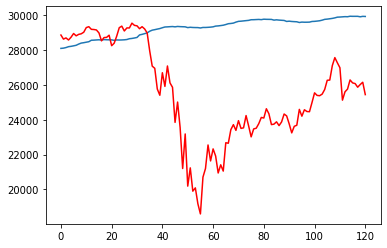

In [62]:
pyplot.plot(forecast['yhat'].values)
pyplot.plot(df_true['Close'].values, color='red')

In [58]:
df_true['Close'].values

array([28868.8 , 28634.88, 28703.38, 28583.68, 28745.09, 28956.9 ,
       28823.77, 28907.05, 28939.67, 29030.22, 29297.64, 29348.1 ,
       29196.04, 29186.27, 29160.09, 28989.73, 28535.8 , 28722.85,
       28734.45, 28859.44, 28256.03, 28399.81, 28807.63, 29290.85,
       29379.77, 29102.51, 29276.82, 29276.34, 29551.42, 29423.31,
       29398.08, 29232.19, 29348.03, 29219.98, 28992.41, 27960.8 ,
       27081.36, 26957.59, 25766.64, 25409.36, 26703.32, 25917.41,
       27090.86, 26121.28, 25864.78, 23851.02, 25018.16, 23553.22,
       21200.62, 23185.62, 20188.52, 21237.38, 19898.92, 20087.19,
       19173.98, 18591.93, 20704.91, 21200.55, 22552.17, 21636.78,
       22327.48, 21917.16, 20943.51, 21413.44, 21052.53, 22679.99,
       22653.86, 23433.57, 23719.37, 23390.77, 23949.76, 23504.35,
       23537.68, 24242.49, 23650.44, 23018.88, 23475.82, 23515.26,
       23775.27, 24133.78, 24101.55, 24633.86, 24345.72, 23723.69,
       23749.76, 23883.09, 23664.64, 23875.89, 24331.32, 24221